In [1]:
# Importing important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Data Preprocessing Libraries
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Importing the Dataset
df = pd.read_csv('data.csv')

In [5]:
# Displaying First 10 rows of Dataset
df.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


## Data Preprocessing and Data Cleaning

In [6]:
# Dropping Patient ID Columns i.e p_id because it is of no use to our model
df = df.drop('p_id', axis=1)

In [7]:
# By looking at the Dataset, we can observe Several Anomalies present in it like,
# Woman getting Pregnant for more than 10 Times (Rarely Possible, (17 times for a Data Point))
# Blood Pressure Equals to 0 (Not Possible) and etc
df.loc[df['no_times_pregnant'] >= 10, 'no_times_pregnant'] = np.nan
should_not_be_zero = ['glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi']
df[should_not_be_zero] = df[should_not_be_zero].replace(0, np.nan)

In [8]:
# Storing All Column Names in a List
columns = list(df.columns)

In [9]:
# Checking for presence of Null Values
df.isnull().sum()

no_times_pregnant         46
glucose_concentration      4
blood_pressure            31
skin_fold_thickness      187
serum_insulin            304
bmi                       10
diabetes pedigree          0
age                        0
diabetes                   0
dtype: int64

In [10]:
# Dropping Columns with high amount of presence of missing values (10%)
for col in columns:
    if (df[col].isnull().sum() / df[col].shape[0]) > 0.1:
        df = df.drop(col, axis=1)

In [11]:
# For remaining columns Creating Instances of Imputer Class for Missing Value Management
imputer_mode = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# Separating Features and Class
X = df.iloc[:, :-1].values
y = df.iloc[:, 6].values

In [13]:
# Managing Missing Data
X[:, 1:4] = imputer_mean.fit_transform(X[:, 1:4])
X[:, :1] = imputer_mode.fit_transform(X[:, :1])

In [14]:
# Splitting the Dataset into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model Building and Training

In [15]:
# Creating Classifier and Accuracy Score Lists
classifiers = ['Decision Tree Classifier', 'K-Nearest Neighbor Classifier', 'Random Forest Classifier', 'Logistic Regression']
scores = list()

In [16]:
# Training using Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [17]:
# Training using K-Nearest Neighbor Classifier
clf2 = KNeighborsClassifier(n_neighbors = 9)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [18]:
# Training using Random Forest Classifier
clf3 = RandomForestClassifier(n_estimators = 20)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [19]:
# Training using Logistic Regression
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Model Evaluation

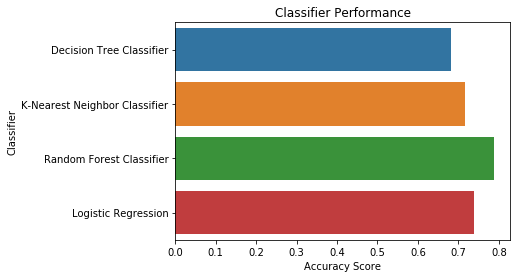

In [20]:
# Evaluating Performance of all the Classifiers
sns.barplot(x=scores, y=classifiers)
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Performance')
plt.show()

As we can see that Random Forest Classifier has the best Accuracy Score, therefore we'll use it as the Final Model

In [21]:
# Checking on Sample Data
ds = [
    ['no_times_pregnant', 'glucose_concentration', 'blood_pressure', 'bmi', 'diabetes pedigree', 'age'],
    [0, 100, 140, 31.1, 0.5, 57]
]

In [22]:
# Sample Set Preprocessing
ds = pd.DataFrame(ds[1:], columns=ds[0])

In [23]:
['Yes' if clf3.predict(ds)[0] == 0 else 'No'][0]

'Yes'